### 1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv')
id=data['Unnamed: 0']
del data['Unnamed: 0']

### 2) Convert `default` and `student` to categorical variables.

In [2]:
data['default'][data['default']=='No']=0
data['default'][data['default']=='Yes']=1
data['student'][data['student']=='Yes']=1
data['student'][data['student']=='No']=0

D:\Software\Program\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Software\Program\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Software\Program\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Soft

### 3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color of the outcome of `default` labeled red if yes and blue if no. 

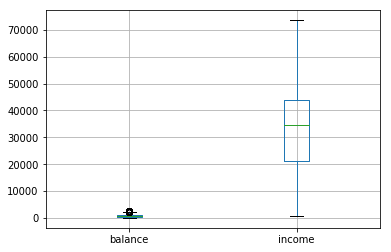

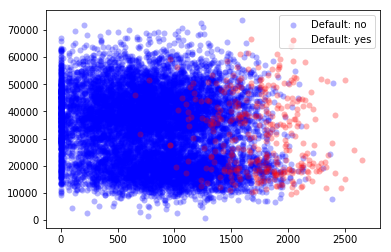

In [3]:
#boxplot
data.boxplot()
plt.show()
#scatter plot
no,yes=data.groupby('default')
plt.scatter(no[1]['balance'],no[1]['income'],label='Default: no',c='blue',alpha=0.3,lw=0.001)
plt.scatter(yes[1]['balance'],yes[1]['income'],label='Default: yes',c='red',alpha=0.3,lw=0.001)
plt.legend()
plt.show()

### 4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
#student data
student=data
student.index=range(0,student.shape[0])

#standardize
scale=StandardScaler()
student[['income','balance']]=pd.DataFrame(scale.fit_transform(X=student[['income','balance']]))

#split data
[train,test]=train_test_split(student,test_size=0.2)
y_train=train['default'].astype('int')
x_train=train[['balance','income']]
y_test=test['default'].astype('int')
x_test=test[['balance','income']]
#construct model
model_student=LogisticRegression()
model_student.fit(x_train,y_train)
pre=model_student.predict(x_test)
#result
accuracy_train=np.sum(model_student.predict(x_train)==y_train)/len(y_train)
accuracy=np.sum(pre==y_test)/len(y_test)
print('Training error:\t',1-accuracy_train,'\nTesting error:\t',1-accuracy)

Training error:	 0.02525 
Testing error:	 0.0305


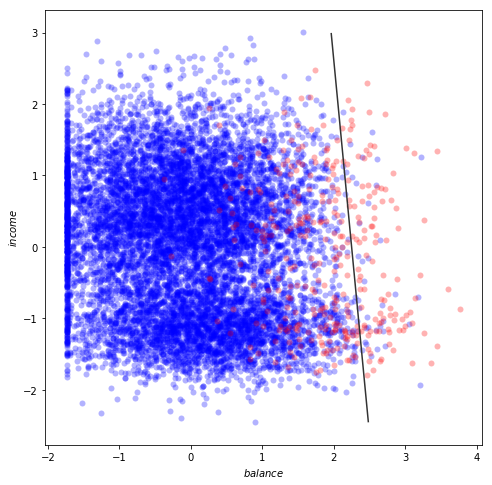

In [21]:
#dicision boundary
xx, yy = np.mgrid[min(student['balance']):max(student['balance']):0.01, min(student['income']):max(student['income']):0.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model_student.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 8))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
no,yes=student.groupby('default')
ax.scatter(no[1]['balance'],no[1]['income'],label='Default: no',c='blue',alpha=0.3,lw=0.001)
ax.scatter(yes[1]['balance'],yes[1]['income'],label='Default: yes',c='red',alpha=0.3,lw=0.001)
ax.set(aspect="equal",xlabel="$balance$", ylabel="$income$")
plt.show()

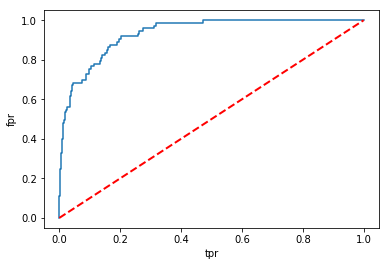

AUC:	 0.933746116826


In [22]:
#ROC curve
from sklearn.metrics import roc_curve,auc

fpr,tpr,c=roc_curve(y_test,pd.DataFrame(model_student.predict_proba(x_test))[1])

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

print('AUC:\t',auc(fpr,tpr))

### 5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking of coefficients.  

In [23]:
#scale data
X=data
X[['income','balance']]=pd.DataFrame(scale.fit_transform(X=X[['income','balance']]))

#split data
[train,test]=train_test_split(X,test_size=0.2)
y_train=train['default'].astype('int')
x_train=train[['student','balance','income']]
y_test=test['default'].astype('int')
x_test=test[['student','balance','income']]
#construct model
model2=LogisticRegression(penalty='l2')
model2.fit(x_train,y_train)
pre=model2.predict(x_test)
#result
accuracy_train=np.sum(model2.predict(x_train)==y_train)/len(y_train)
accuracy=np.sum(pre==y_test)/len(y_test)
print('Training error:\t',1-accuracy_train,'\nTesting error:\t',1-accuracy)

Training error:	 0.02675 
Testing error:	 0.024


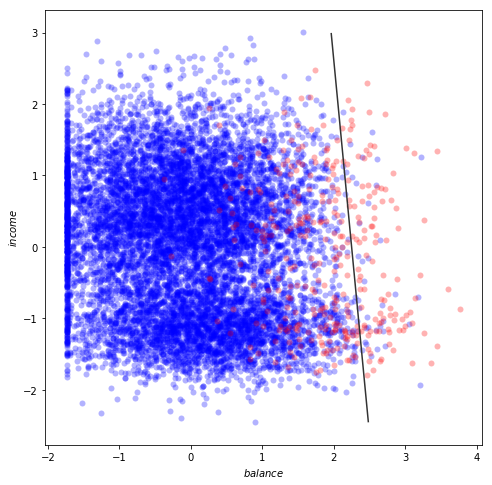

In [24]:
#dicision boundary
xx, yy = np.mgrid[min(X['balance']):max(X['balance']):0.01, min(X['income']):max(X['income']):0.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model_student.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 8))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
no,yes=student.groupby('default')
ax.scatter(no[1]['balance'],no[1]['income'],label='Default: no',c='blue',alpha=0.3,lw=0.001)
ax.scatter(yes[1]['balance'],yes[1]['income'],label='Default: yes',c='red',alpha=0.3,lw=0.001)
ax.set(aspect="equal",xlabel="$balance$", ylabel="$income$")
plt.show()

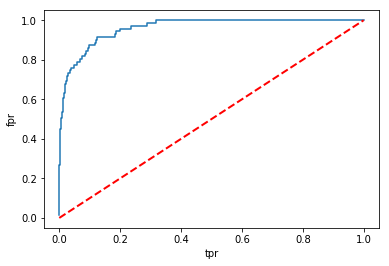

AUC:	 0.960944516242


In [25]:
#ROC curve
fpr,tpr,c=roc_curve(y_test,pd.DataFrame(model2.predict_proba(x_test))[1])
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

print('AUC:\t',auc(fpr,tpr))

After adding the feature student, the accuracy rate of the model predicting default increases and the AUC also increases, which means that adding student is a good choice.

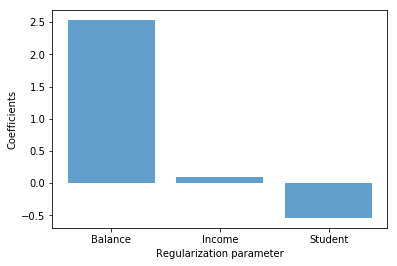

Student:  -0.539493511318 
Balance:  2.52838874124 
Income:  0.0897938698356


In [26]:
#plot coefficients
plt.xlabel('Regularization parameter')
plt.ylabel('Coefficients')
A=pd.DataFrame(model2.coef_).append(pd.DataFrame([['Student','Balance','Income']])).T
plt.bar(A.iloc[:,1],A.iloc[:,0],alpha=0.7)
plt.show()
print('Student: ',model2.coef_[0][0],'\nBalance: ',model2.coef_[0][1],'\nIncome: ',model2.coef_[0][2])

### 6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

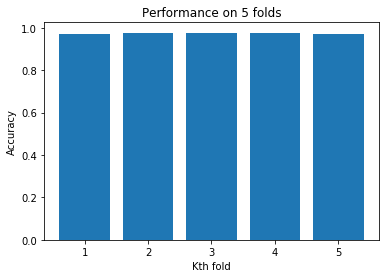

The scores for optimal alpha is: 
 [ 0.97001874  0.97314179  0.974375    0.97623515  0.9724828 ]


In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, x_train, y_train, cv=5)
plt.xlabel('Kth fold')
plt.ylabel('Accuracy')
plt.title('Performance on 5 folds')
plt.bar(range(1,6),scores)
plt.show()
print ("The scores for optimal alpha is: \n",scores)


From the plot and result, we regard the model is robust

### 7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree.

In [12]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
#scale data
X=data
#split data
[train,test]=train_test_split(X,test_size=0.2)
y_train=train['default'].astype('int')
x_train=train[['student','balance','income']]
y_test=test['default'].astype('int')
x_test=test[['student','balance','income']]
#construct model
tree=DecisionTreeClassifier(max_depth=5)
tree.fit(x_train,y_train)
#performance
error_train=1-tree.score(x_train,y_train)
error_test=1-tree.score(x_test,y_test)
print('Training error:\t',error_train,'\nTesting error:\t',error_test)

Training error:	 0.022125 
Testing error:	 0.036


The performance of dicision tree is a little bit better than logistic regression.

### 8) Find the optimal decision tree depth and compute the AUC ROC. 

In [32]:
#select depth by cross validation
depth_params = np.arange(1, 11)
score=[]
for i in depth_params:
    print("tuning parameter: ", i)
    tree = DecisionTreeClassifier(max_depth=i)
    score.append(np.mean(cross_val_score(tree, x_train, y_train, cv=5)))

opt_depth = depth_params[np.argmax(score)]
print('CV selected depth:', opt_depth)

tuning parameter:  1
tuning parameter:  2
tuning parameter:  3
tuning parameter:  4
tuning parameter:  5
tuning parameter:  6
tuning parameter:  7
tuning parameter:  8
tuning parameter:  9
tuning parameter:  10
CV selected depth: 3


Hence, we see that the optimal depth of tree is 3

In [33]:
#build optimal tree
tree = DecisionTreeClassifier(max_depth=opt_depth)
tree.fit(x_train,y_train)
error_test=1-tree.score(x_test,y_test)
error_train=1-tree.score(x_train,y_train)
print('Training error:\t',error_train,'\nTesting error:\t',error_test)

Training error:	 0.026 
Testing error:	 0.027


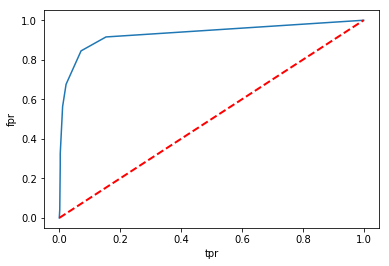

AUC:	 0.931132674742


In [34]:
#ROC curve
fpr,tpr,c=roc_curve(y_test,pd.DataFrame(tree.predict_proba(x_test))[1])
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

print('AUC:\t',auc(fpr,tpr))